<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/Warmup/NumpyAndLinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
from google . colab . patches import cv2_imshow
import cv2

#Calculations with Vectors and Matrices

##Length of Vector

In [5]:
def compute_vector_length(vector):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

##Dot product

In [6]:
def compute_dot_product(vector1, vector2):
  dot_product = np.dot(vector1, vector2)
  return dot_product

##Multiplying a vector by a matrix

In [7]:
def matrix_multi_vector(matrix, vector):
  result = np.matmul(matrix, vector)
  return result

##Multiplying matrix by matrix

In [8]:
def matrix_multi_matrix(matrix1, matrix2):
  result = np.matmul(matrix1, matrix2)
  return result

##Matrix inverse

In [9]:
def inverse_matrix(matrix):
  inverse = np.linalg.inv(matrix)
  return inverse

##Eigenvector và eigenvalues

In [10]:
def compute_eigenvalues_eigenvectors(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  return eigenvalues, eigenvectors

##Cosine Similarity

In [11]:
def compute_cosine(v1 , v2):
  cosine = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
  return cosine

##Testing

In [14]:
vector = np. array ([ -2 , 4 , 9 , 21])
result = compute_vector_length (vector)
print(round(result ,2))

23.28


In [15]:
v1 = np. array ([0 , 1 , -1 , 2])
v2 = np. array ([2 , 5 , 1 , 0])
result = compute_dot_product (v1 , v2)
print ( round (result ,2) )

4


In [18]:
m = np. array ([[ -1 , 1 , 1] , [0 , -4 , 9]])
v = np. array ([0 , 2 , 1])
result = matrix_multi_vector (m, v)
print ( result )

[3 1]


In [19]:
m1 = np. array ([[0 , 1 , 2] , [2 , -3 , 1]])
m2 = np. array ([[1 , -3] ,[6 , 1] , [0 , -1]])
result = matrix_multi_matrix (m1 , m2)
print ( result )

[[  6  -1]
 [-16 -10]]


In [28]:
matrix = np. array ([[0.9 , 0.2] , [0.1 , 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors ( matrix )
print ( eigenvectors )

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [27]:
m1 = np. array ([[ -2 , 6] , [8 , -4]])
result = inverse_matrix (m1)
print ( result )

[[0.1  0.15]
 [0.2  0.05]]


In [29]:
x = np. array ([1 , 2 , 3 , 4])
y = np. array ([1 , 0 , 3 , 0])
result = compute_cosine (x,y)
print ( round (result , 3) )

0.577


#Background Substraction

##Load data

In [30]:
!gdown 1dOKVzUrqlWrOjphAS4Knscgp7Ou1WXjr
!gdown 1gLv6IGWCtIJmCaYU1Gk2JOLNz_zQEbYb
!gdown 1-F1yt4DdQInrlLVrEvBMJknZB9ekIX-G

Downloading...
From: https://drive.google.com/uc?id=1dOKVzUrqlWrOjphAS4Knscgp7Ou1WXjr
To: /content/M2W2_Object.png
100% 51.0k/51.0k [00:00<00:00, 53.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gLv6IGWCtIJmCaYU1Gk2JOLNz_zQEbYb
To: /content/M2W2_GreenBackground.png
100% 5.51k/5.51k [00:00<00:00, 16.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F1yt4DdQInrlLVrEvBMJknZB9ekIX-G
To: /content/M2W2_NewBackground.jpg
100% 64.3k/64.3k [00:00<00:00, 58.5MB/s]


In [37]:
bg1_image = cv2.imread('/content/M2W2_GreenBackground.png')
sz = bg1_image.shape

obj_image = cv2.imread('/content/M2W2_Object.png')
obj_image = cv2.resize(obj_image, (sz[1], sz[0]))

bg2_image = cv2.imread('/content/M2W2_NewBackground.jpg')
bg2_image = cv2.resize(bg2_image, (sz[1], sz[0]))

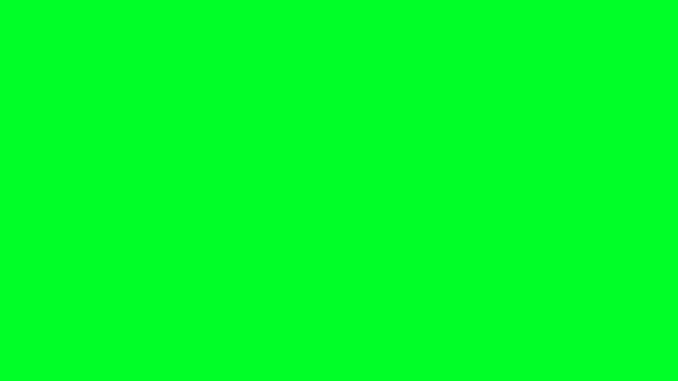

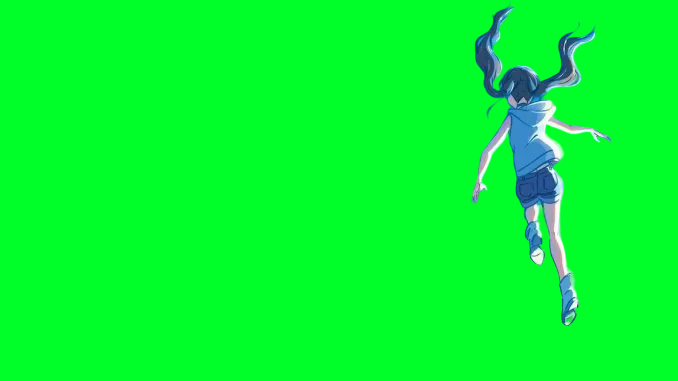

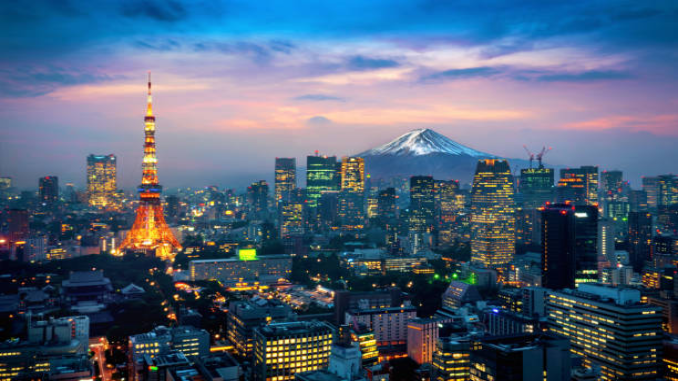

In [38]:
cv2_imshow(bg1_image)
cv2_imshow(obj_image)
cv2_imshow(bg2_image)


##Process background substraction

In [40]:
def compute_difference ( bg_img , input_img ) :
  difference_single_channel = cv2.absdiff(bg_img, input_img)
  return difference_single_channel

In [43]:
def compute_binary_mask ( difference_single_channel ) :
  difference_binary = np.where(difference_single_channel == 0, 255, 0)
  return difference_binary

In [51]:
def replace_background ( bg1_image , bg2_image , ob_image ):
  difference_single_channel = compute_difference (bg1_image ,ob_image)
  binary_mask = compute_binary_mask ( difference_single_channel )
  output = np. where ( binary_mask ==255 , bg2_image , ob_image )
  return output

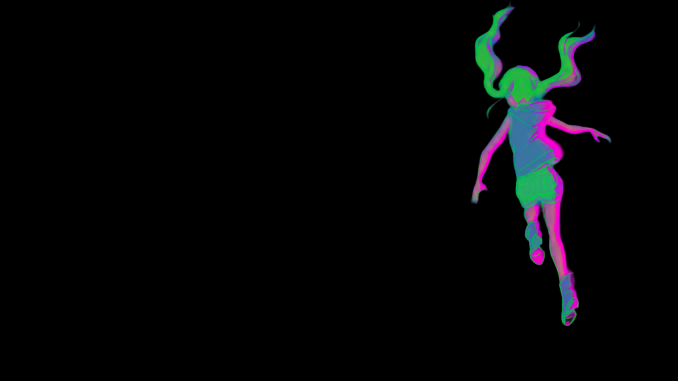

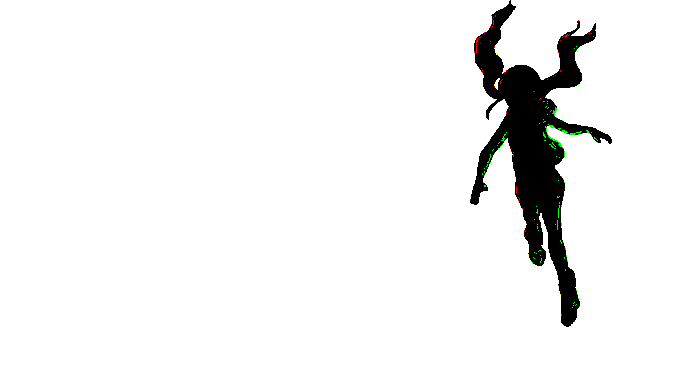

In [54]:
#Testing
difference_single_channel = compute_difference ( bg1_image , obj_image )
cv2_imshow ( difference_single_channel )

binary_mask = compute_binary_mask ( difference_single_channel )
cv2_imshow ( binary_mask )

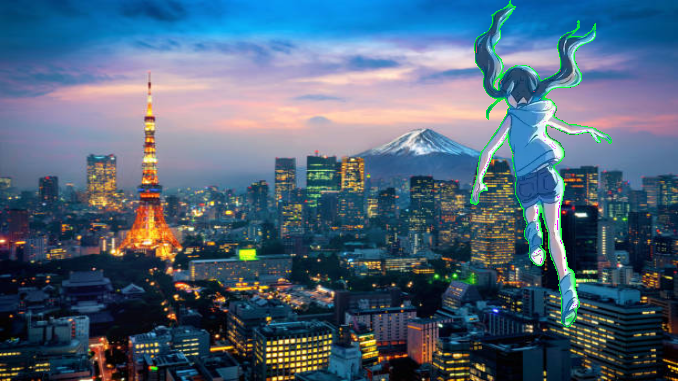

In [53]:
new_image = replace_background(bg1_image, bg2_image, obj_image)
cv2_imshow(new_image)